In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

# from utils import ax_default

In [3]:
N = 20
Nd = 10
i = 1
exo_bds = [(-1, 0), (0,2)]
d = len(exo_bds)
ub = [b[1] for b in exo_bds]
xi_slice = np.linspace(exo_bds[i][0], exo_bds[i][1], N)
xs = np.zeros((N, Nd, d))
x0 = np.array([bds[0] for bds in exo_bds])     # Start at lower left corner of domain

vec = np.random.rand(d, Nd)
vhat = vec / np.linalg.norm(vec, axis=0)            # Random "positive" unit vector in d dimensions
dxi = xi_slice[1] - xi_slice[0]             # Increment in the slice variable
M = dxi / vhat[i, :]                           # Step size of the walk (or slice)
dx = vhat * M                               # Increment for all directions
xs[0, :, :] = np.broadcast_to(x0, (Nd, d))
for k in range(1, N):
    xs[k, :, :] = np.minimum(xs[k-1, :, :] + dx.T, np.broadcast_to(ub, (Nd, d)))

<IPython.core.display.Javascript object>


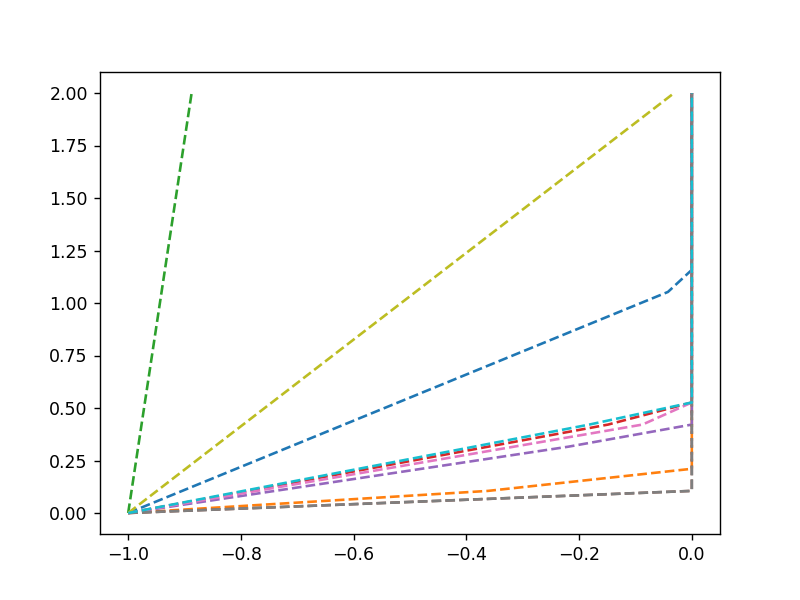

In [4]:
fig, ax = plt.subplots()
for i in range(Nd):
    ax.plot(xs[:, i, 0], xs[:, i, 1], '--')
plt.show()

In [13]:
N = 50
Nd = 8
i = 0
exo_bds = [(-1, 0), (0,2), (2, 3)]
d = len(exo_bds)
ub = [b[1] for b in exo_bds]
xi_slice = np.linspace(exo_bds[i][0], exo_bds[i][1], N)
xs = np.zeros((N, Nd, d))
x0 = np.array([bds[0] for bds in exo_bds])     # Start at lower left corner of domain

vec = np.random.rand(d, Nd)
vhat = vec / np.linalg.norm(vec, axis=0)            # Random "positive" unit vector in d dimensions
dxi = xi_slice[1] - xi_slice[0]             # Increment in the slice variable
M = dxi / vhat[i, :]                           # Step size of the walk (or slice)
dx = vhat * M                               # Increment for all directions
xs[0, :, :] = np.broadcast_to(x0, (Nd, d))
for k in range(1, N):
    xs[k, :, :] = np.minimum(xs[k-1, :, :] + dx.T, np.broadcast_to(ub, (Nd, d)))

<IPython.core.display.Javascript object>


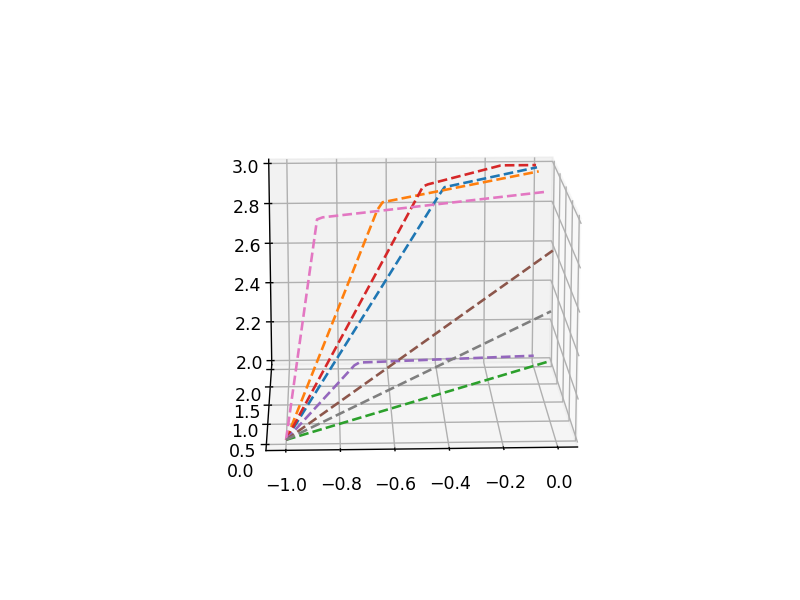

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(Nd):
    ax.plot(xs[:, i, 0], xs[:, i, 1], xs[:, i, 2], '--')
plt.show()

In [9]:
cost_cum = [1, 2, 3, 4 ,5 ,6, 7, 1, 1, 0.5, 0.25]
cost_cum = np.cumsum(cost_cum)
cost_alloc = {'Cathode': {'(0,)': 1, '(1,)': 2}, 'Thruster': {'(0, 0)': 3, '(0, 1)': 5, '(1, 0)': 6, '(1, 1)': 1, '(1, 2)': 1, '(2, 1)': 0.5, '(2, 2)': 0.25}, 'Plume': {'(0,)': 4, '(1,)': 7}}

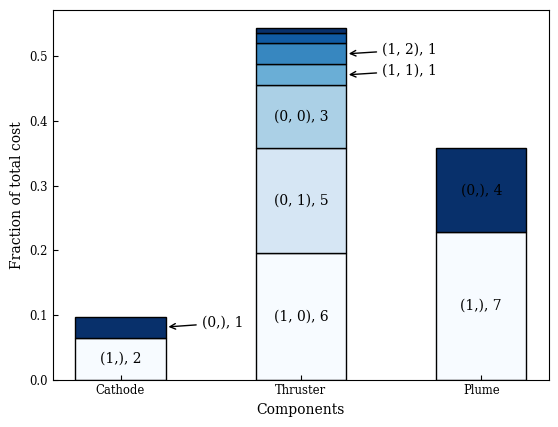

In [23]:
# Bar chart showing cost allocation breakdown
fig, ax = plt.subplots()
width = 0.5
x = np.arange(len(cost_alloc))
xlabels = list(cost_alloc.keys())
cmap = plt.get_cmap('Blues')
for j, (node, alpha_dict) in enumerate(cost_alloc.items()):
    bottom = 0
    c_intervals = np.linspace(0, 1, len(alpha_dict))
    bars = [(alpha, cost, cost / cost_cum[-1]) for alpha, cost in alpha_dict.items()]
    bars = sorted(bars, key=lambda ele: ele[2], reverse=True)
    for i, (alpha, cost, frac) in enumerate(bars):
        p = ax.bar(x[j], frac, width, color=cmap(c_intervals[i]), linewidth=1, edgecolor=[0, 0, 0],
               bottom=bottom)
        bottom += frac
        if cost > 1:
            # Label large bars right on the center of the bar
            ax.bar_label(p, labels=[f'{alpha}, {round(cost)}'], label_type='center')
        elif cost > 0.5:
            # Label smaller bars with a text off to the side
            xy = (x[j] + width/2, bottom - frac/2)
            ax.annotate(f'{alpha}, {round(cost)}', xy, xytext=(xy[0] + 0.2, xy[1]), arrowprops={'arrowstyle': '->', 'linewidth': 1})
        # else:
        #     pass  # Don't label any bar that is smaller than this
            
ax_default(ax, "Components", "Fraction of total cost", legend=False)
ax.set_xticks(x, xlabels)
plt.show()